#### TP1 -- #Grupo 17
# Analisis de Datos

## Analisis Cuantitativo 
    En esta seccion para analizar la diferencia del error absoluto entre Colley y los test de la catedra vamos a utilizar pandas para crear un dataframe y visualizar esta distribucion en un boxplot con seaborn. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import filecmp
from IPython.display import display, HTML

# Analisis Cuantitativo

In [4]:
df_tests_mean = pd.DataFrame(columns=['Test', 'Mean'])

# funcion para calcular la dif absoluta y graficar 
def dif_de_error(dir,color):
    df = pd.read_csv(f"{dir}.expected", sep=" ", names=["Catedra"])
    df_2 = pd.read_csv(f"{dir}.out", sep=" ", header=None, names=["Colley"])
    df['Colley'] = df_2["Colley"]
    df['Diferencia absoluta'] = abs(df['Catedra']-df['Colley'])
    name = dir.split('/')[-1]
    #A partir de aca graficamos
    my_colors = [color]
    sns.set_palette(sns.color_palette(my_colors))
    sns.set_style("whitegrid")
    ax = sns.boxplot(y=df["Diferencia absoluta"])
    ax.set_title(name)
    fig = ax.get_figure()
    fig.savefig(f"graficos/{name}.png")
    plt.show()
    global df_tests_mean
    df_tests_mean = df_tests_mean.append({'Test': name, 'Mean': str(df['Diferencia absoluta'].median())}, ignore_index=True)
    print('La diferencia de caso: '+ name +' tiene un promedio de ' + str(df['Diferencia absoluta'].mean()) + ', una mediana de ' + str(df['Diferencia absoluta'].median()) +  ' y una desviacion de ' + str(df['Diferencia absoluta'].std()))

In [ ]:
# Graficamos los boxplots 
tests = [("test_completos/test_completo_100_4", "#B03A2E" ),
         ("test_completos/test_completo_100_8", "#D4AC0D"),
         ("test_completos/test_completo_1000_2", "#117A65"),
         ("test_completos/test_completo_1000_8", "#7D3C98")]
for test in tests:
    dif_de_error(test[0],test[1])

In [6]:
print(df_tests_mean)

                   Test                    Mean
0   test_completo_100_4    8.14856525033214e-07
1   test_completo_100_8   2.462933029939718e-06
2  test_completo_1000_2  1.4922529980004873e-05
3  test_completo_1000_8   6.737821289498624e-05


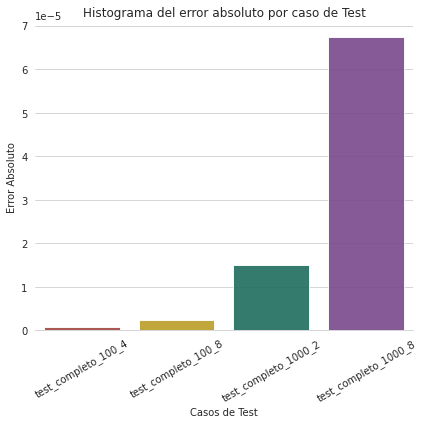

In [25]:
colors =["#B03A2E","#D4AC0D","#117A65","#7D3C98"]
miPaleta = sns.set_palette(sns.color_palette(colors))



chart = sns.catplot(
    data=df_tests_mean, kind="bar",
    x="Test", y="Mean", ci="sd", palette=miPaleta, alpha=.9, height=6
)
chart.despine(left=True)
chart.set_axis_labels("Casos de Test", "Error Absoluto")
plt.title("Histograma del error absoluto por caso de Test")
plt.xticks(rotation=30)
plt.tight_layout()
chart.savefig("histograma_medias.png")

# Analisis Cualitativo

### Generar cuadros comparativos entre metodos
    En esta seccion vamos a unir los resultados de los experimentos para visualizar como el metodo afecta un ranking

## NBA

In [ ]:
df_CMM = open('nba/nba_2016_scores_0.out', 'r').readlines()
df_WP = open('nba/nba_2016_scores_1.out', 'r').readlines()
df_SR = open('nba/nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA.insert(1, 'CMM', columnCMM)
df_NBA.insert(2, 'WP', columnWP)
df_NBA.insert(3, 'SR', columnSR)
display(df_NBA)

### Orden por Colley

In [ ]:
df_NBA.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NBA)

### Orden por WP

In [ ]:
df_NBA.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NBA)

### Orden por SR

In [ ]:
df_NBA.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NBA)

In [ ]:
 df_NBA.sort_values(by=['WP'], ascending=False)['team']


In [ ]:
df_NBA_rankings = df_NBA.drop(['team'],axis=1)
df_NBA_rankings["CMM"] = df_NBA.sort_values(by=['CMM'], ascending=False)['team'].values
df_NBA_rankings["WP"] = df_NBA.sort_values(by=['WP'], ascending=False)['team'].values
df_NBA_rankings["SR"] = df_NBA.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NBA_rankings)

## NFL

In [ ]:
df_CMM = open('nfl/nfl_2019_0.out', 'r').readlines()
df_WP = open('nfl/nfl_2019_1.out', 'r').readlines()
df_SR = open('nfl/nfl_2019_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NFL = pd.read_csv('../data/nfl_teams.csv', names=['team'])

df_NFL.insert(1, 'CMM', columnCMM)
df_NFL.insert(2, 'WP', columnWP)
df_NFL.insert(3, 'SR', columnSR)
display(df_NFL)

### ORDEN POR COLLEY

In [ ]:
df_NFL.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NFL)

### ORDEN POR WP

In [ ]:
df_NFL.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NFL)

### Orden por SR

In [ ]:
df_NFL.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NFL)

### Ranking Results

In [ ]:
df_NFL_rankings = df_NFL.drop(['team'],axis=1)
df_NFL_rankings["CMM"] = df_NFL.sort_values(by=['CMM'], ascending=False)['team'].values
df_NFL_rankings["WP"] = df_NFL.sort_values(by=['WP'], ascending=False)['team'].values
df_NFL_rankings["SR"] = df_NFL.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NFL_rankings)

## NHL

In [ ]:
df_CMM = open('nhl/nhl_2019_0.out', 'r').readlines()
df_WP = open('nhl/nhl_2019_1.out', 'r').readlines()
df_SR = open('nhl/nhl_2019_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NHL = pd.read_csv('../data/nhl_teams.csv', names=['team'])

df_NHL.insert(1, 'CMM', columnCMM)
df_NHL.insert(2, 'WP', columnWP)
df_NHL.insert(3, 'SR', columnSR)
display(df_NHL)

### Orden por Colley

In [ ]:
df_NHL.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_NHL)

### Orden por WP

In [ ]:
df_NHL.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_NHL)

### Orden por SR

In [ ]:
df_NHL.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_NHL)

### Ranking Results

In [ ]:
df_NHL_rankings = df_NHL.drop(['team'],axis=1)
df_NHL_rankings["CMM"] = df_NHL.sort_values(by=['CMM'], ascending=False)['team'].values
df_NHL_rankings["WP"] = df_NHL.sort_values(by=['WP'], ascending=False)['team'].values
df_NHL_rankings["SR"] = df_NHL.sort_values(by=['SR'], ascending=False)['team'].values
display(df_NHL_rankings)

## ATP

In [ ]:
def atp_players_ids(file):
    df_ATP = open(file)
    set_players = set()
    first_row = True
    for row in df_ATP:
        if (first_row):
            first_row = False
            continue
        set_players.add(int(row[9:15]))
        set_players.add(int(row[18:24]))
    return set_players



In [ ]:
def fetch_atp_players_names_by_id(list_players):
    df_players = pd.read_csv("../data/atp_players.csv",
                            names=['player_id','first_name','last_name','hand','birth_date','country_code'],header=None)
    list_players_name_sorted = []
    for id_p in list_players:
        player_row = df_players.loc[df_players['player_id'] == id_p]
        player_name = player_row.iloc[0]['last_name'] + " " + player_row.iloc[0]['first_name']
        list_players_name_sorted.append(player_name)
    return list_players_name_sorted

In [ ]:
#Busco id de jugadores del dataset
set_players = atp_players_ids("../data/atp_matches_2015.dat")
#Los ordeno
list_players = sorted(set_players)
#Busco los IDs en el archivo de players
list_players_name_sorted = fetch_atp_players_names_by_id(list_players)

df_CMM = open("atp/atp_matches_2015_0.out", 'r').readlines()
df_WP  = open("atp/atp_matches_2015_1.out", 'r').readlines()
df_SR  = open("atp/atp_matches_2015_2.out", 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_ATP = pd.DataFrame()

df_ATP.insert(0, 'player', list_players_name_sorted)
df_ATP.insert(1, 'CMM', columnCMM)
df_ATP.insert(2, 'WP', columnWP)
df_ATP.insert(3, 'SR', columnSR)
display(df_ATP)


In [ ]:
df_ATP.sort_values(by=['CMM'], ascending=False, inplace=True)
display(df_ATP.head(10))
df_ATP.sort_values(by=['WP'], ascending=False, inplace=True)
display(df_ATP.head(10))
df_ATP.sort_values(by=['SR'], ascending=False, inplace=True)
display(df_ATP.head(10))

In [ ]:
df_ATP_rankings = df_ATP.drop(['player'],axis=1)
df_ATP_rankings["CMM"] = df_ATP.sort_values(by=['CMM'], ascending=False)['player'].values
df_ATP_rankings["WP"] =  df_ATP.sort_values(by=['WP'],  ascending=False)['player'].values
df_ATP_rankings["SR"] =  df_ATP.sort_values(by=['SR'],  ascending=False)['player'].values
display(df_ATP_rankings)

In [ ]:
display(df_ATP_rankings.head(10))

### Busco a los Top 3 de SR y WP en el dataset (El chequeo es manual)
-   1 | Garay Christian
    - ID = 125571
    - Jugo solo 2 partidos, ambos partidos los gano

-   2 | Ghareeb Mohammad
    - ID = 103600
    - Jugo solo 3 partidos, gano todos

-   3 | Qureshi Aisam Ul Haq
    - ID = 103529
    - Jugo solo 2 partidos, ambos partidos los gano

-   4 | Lama Gonzalo
    - ID = 106174
    - Jugo solo 2 partidos, ambos partidos los gano
    
-   5 | Garin Christian
    - ID = 106426
    - Jugo solo 3 partidos, gano todos

#### Experimento extra del analisis cualitativo de ATP

In [ ]:
#Busco id de jugadores del dataset
set_players = atp_players_ids("atp/ej_cualitativo/atp_filtered_2015.dat")
#Los ordeno
list_players = sorted(set_players)
#Busco los IDs en el archivo de players
list_players_name_sorted = fetch_atp_players_names_by_id(list_players)

df_CMM = open("atp/ej_cualitativo/atp_filtered_2015_0.out", 'r').readlines()
df_WP  = open("atp/ej_cualitativo/atp_filtered_2015_1.out", 'r').readlines()
df_SR  = open("atp/ej_cualitativo/atp_filtered_2015_2.out", 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_ATP = pd.DataFrame()

df_ATP.insert(0, 'player', list_players_name_sorted)
df_ATP.insert(1, 'CMM', columnCMM)
df_ATP.insert(2, 'WP', columnWP)
df_ATP.insert(3, 'SR', columnSR)
display(df_ATP)

In [ ]:
df_ATP_rankings = df_ATP.drop(['player'],axis=1)
df_ATP_rankings["CMM"] = df_ATP.sort_values(by=['CMM'], ascending=False)['player'].values
df_ATP_rankings["WP"] =  df_ATP.sort_values(by=['WP'],  ascending=False)['player'].values
df_ATP_rankings["SR"] =  df_ATP.sort_values(by=['SR'],  ascending=False)['player'].values
display(df_ATP_rankings.head(10))

## Experimento 1

In [ ]:
df_CMM = open('dataset_adhoc/upset_nba_2016_scores_0.out', 'r').readlines()
df_WP = open('dataset_adhoc/upset_nba_2016_scores_1.out', 'r').readlines()
df_SR = open('dataset_adhoc/upset_nba_2016_scores_2.out', 'r').readlines()
columnCMM = []
columnWP = []
columnSR = []
for row in df_CMM:
    columnCMM.append(float(row))
for row in df_WP:
    columnWP.append(float(row))
for row in df_SR:
    columnSR.append(float(row))

df_NBA_upset = pd.read_csv('../data/nba_2016_teams.csv', names=['team'])

df_NBA_upset.insert(1, 'CMM', columnCMM)
df_NBA_upset.insert(2, 'WP', columnWP)
df_NBA_upset.insert(3, 'SR', columnSR)

df_NBA_rankings_upset = df_NBA_rankings
df_NBA_rankings_upset["CMM_U"] = df_NBA_upset.sort_values(by=['CMM'], ascending=False)['team'].values
df_NBA_rankings_upset["WP_U"] = df_NBA_upset.sort_values(by=['WP'], ascending=False)['team'].values
df_NBA_rankings_upset["SR_U"] = df_NBA_upset.sort_values(by=['SR'], ascending=False)['team'].values


#display(df_NBA_rankings)
display(df_NBA_rankings_upset)

df_NBA["CMM_U"] = df_NBA_upset['CMM']
df_NBA["WP_U"] = df_NBA_upset['WP']
df_NBA["SR_U"] = df_NBA_upset['SR']
display(df_NBA)


## Experimento 2


In [ ]:
## Buscamos diferencias en los ratings al alterar el orden
def comparar():
    flag_diferencias = False
    datasets = ["nba/nba_2016_scores",
                "nfl/nfl_2019","atp/atp_matches_2015","nhl/nhl_2019"]
    for d in datasets:
        for i in range(3):
            #comparamos si el resultado es el mismo
            dir1=f'{d}_{i}.out'
            dir2=f'{d}_reversed_{i}.out'
            if (not filecmp.cmp(dir1,dir2,shallow=False) ):
                flag_diferencias = True
                print("Diferencias encontradas en ", dir1)
    if(not flag_diferencias):
        print("No se encontraron diferencias")

comparar()

## Experimento 3

In [ ]:
def exp3_chico(nro_met,nombre_met):
    df_met =  open(f"Exp3/out/test_1.dat_{nro_met}.out", 'r').readlines()
    df_met1 = open(f"Exp3/out/test_1_mod1_{nro_met}.out", 'r').readlines()
    df_met2 = open(f"Exp3/out/test_1_mod2_{nro_met}.out", 'r').readlines()
    df_met3 = open(f"Exp3/out/test_1_mod3_{nro_met}.out", 'r').readlines()
    column_met = []
    column_met1 = []
    column_met2 = []
    column_met3 = []
    for row in df_met:
        column_met.append(float(row))
    for row in df_met1:
        column_met1.append(float(row))
    for row in df_met2:
        column_met2.append(float(row))
    for row in df_met3:
        column_met3.append(float(row))

    df_test = pd.DataFrame()
    df_test.insert(0,"Team",range(1,len(column_met)+1))
    df_test.insert(1, f"{nombre_met}",  column_met)
    df_test.insert(2, f"{nombre_met}1", column_met1)
    df_test.insert(3, f"{nombre_met}2", column_met2)
    df_test.insert(4, f"{nombre_met}3", column_met3)

    display(df_test)

In [ ]:
exp3_chico("0","CMM")
exp3_chico("1","WP")
exp3_chico("2","SR")

In [ ]:
def exp3_grande(nro_met,nombre_met):
    df_met = open(f"Exp3/out/nfl_2019_{nro_met}.out", 'r').readlines()
    df_met_mod = open(f"Exp3/out/nfl_2019_mod_{nro_met}.out", 'r').readlines()
    column_met = []
    column_met_mod = []
    for row in df_met:
        column_met.append(float(row))
    for row in df_met_mod:
        column_met_mod.append(float(row))

    df_test = pd.DataFrame()
    #df_test_1.insert(0,"Team",range(1,len(columnCMM)+1))

    df_test = pd.read_csv('../data/nfl_teams.csv', names=['Team'])

    df_test.insert(1, f"{nombre_met}", column_met)
    df_test.insert(2, f"{nombre_met} mod", column_met_mod)

    df_test.sort_values(by=[f"{nombre_met}"], ascending=False, inplace=True)
    display(df_test)

In [ ]:
exp3_grande("0","CMM")
exp3_grande("1","WP")
exp3_grande("2","SR")

## Experimento 4


In [ ]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.barplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', edgecolor = 'w', estimator=np.mean)

gr.set_title("Tiempos de ejecución para los distintos metodos")
gr.set_ylabel("tiempo (μs)")

fig = gr.get_figure()
name = "exp4_tiempos"
fig.savefig(f"graficos/{name}.png")


In [ ]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4.csv')

plt.figure()
plt.figure(figsize=(8,6))
gr = sns.boxplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues',)

gr.set_title("Tiempos de ejecución para los distintos metodos")
gr.set_ylabel("tiempo (μs)")

#fig = gr.get_figure()
#name = "exp4_tiempos"
#fig.savefig(f"graficos/{name}.png")

In [ ]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4_time_mod.csv')

plt.figure()
plt.figure(figsize=(8,7))
gr = sns.barplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', edgecolor = 'w', estimator=np.mean)

gr.set_title("Tiempos de ejecución para los distintos metodos (sin carga de datos)")
gr.set_ylabel("tiempo (μs)")

#Escala logaritmica
gr.set_yscale("log")

plt.ylim(top=10**5, bottom=0)

fig = gr.get_figure()
name = "exp4_tiempos_time_mod"
fig.savefig(f"graficos/{name}.png")

In [ ]:
df_tiempos = pd.read_csv('Exp4/resultado_exp4_time_mod.csv')
#df_tiempos = df_tiempos[ df_tiempos['dataset']!='ATP 2015']

plt.figure()
plt.figure(figsize=(8,7))
gr = sns.boxplot(x = 'dataset', y = 'tiempo', hue = 'metodo', data = df_tiempos,
            palette = 'Blues', showfliers= False)

gr.set_title("Tiempos de ejecución para los distintos metodos (sin carga de datos)")
gr.set_ylabel("tiempo (μs)")

#Escala logaritmica
gr.set_yscale("log")

plt.ylim(top=10**5, bottom=0)

#fig = gr.get_figure()
#name = "exp4_tiempos_time_mod"
#fig.savefig(f"graficos/{name}.png")